In [2]:
# Importing necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from queries import queries  # Import the queries dictionary

In [3]:
DB_PATH = "cricket_data.sqlite"

def connect_to_database(db_path):
    """Connect to SQLite database."""
    try:
        conn = sqlite3.connect(db_path)
        print("Connected to database successfully.")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Connect to the database
conn = connect_to_database(DB_PATH)

def execute_query(conn, query):
    """Execute a single SQL query and return the result as a DataFrame."""
    try:
        df = pd.read_sql_query(query, conn)
        return df
    except Exception as e:
        print(f"Error executing query: {e}")
        return pd.DataFrame()


Connected to database successfully.


Executing query: highest_run_victories_odi
   outcome_by_runs        city   season
0              257        None  2014/15
1              243    Trinidad  2006/07
2              200     Tarouba     2023
3              200        None     2010
4              198        None     2014
5              190      Mumbai  2023/24
6              181      London     2023
7              180     Colombo     2013
8              177  Kurunegala     2008
9              177     Grenada     2014


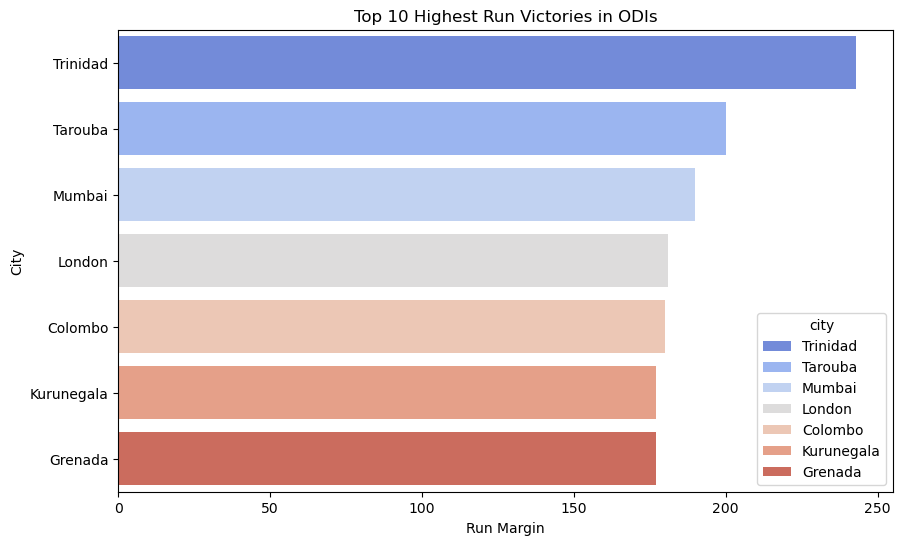

In [4]:
# # 1.Highest Run Victories in ODI
query_name = "highest_run_victories_odi"
if query_name in queries:
    print(f"Executing query: {query_name}")
    query_sql = queries[query_name]
    result_df = execute_query(conn, query_sql)
    print(result_df)
    
    # Check if the DataFrame is not empty
    if not result_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x="outcome_by_runs", y="city", data=result_df, palette="coolwarm", hue="city", dodge=False)
        plt.title("Top 10 Highest Run Victories in ODIs")
        plt.xlabel("Run Margin")
        plt.ylabel("City")
        plt.show()
    else:
        print("No data available for visualization.")
else:
    print("Query not found.")


Executing query: overs_distribution_odi
   overs  match_count
0   50.0          500


C:\Users\user\AppData\Local\Temp\ipykernel_27600\1161225620.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="overs", y="match_count", data=result_df, palette="Blues_d")


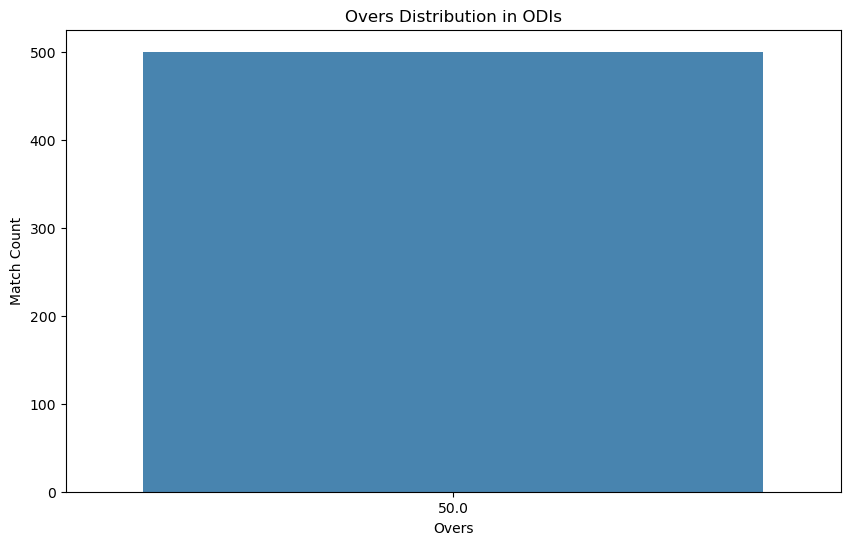

In [5]:
# 2.Overs Distribution in ODI
query_name = "overs_distribution_odi"
if query_name in queries:
    print(f"Executing query: {query_name}")
    query_sql = queries[query_name]
    result_df = execute_query(conn, query_sql)
    print(result_df)
    
    if not result_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x="overs", y="match_count", data=result_df, palette="Blues_d")
        plt.title("Overs Distribution in ODIs")
        plt.xlabel("Overs")
        plt.ylabel("Match Count")
        plt.show()
    else:
        print("No data available for visualization.")
else:
    print("Query not found.")


Executing query: frequent_venues_odi
         city  match_count
0     Colombo           20
1      London           14
2    Bulawayo           14
3      Harare           13
4    Windhoek           12
5   Centurion           11
6   Abu Dhabi            9
7  Wellington            8
8  Hambantota            8
9      Dublin            8


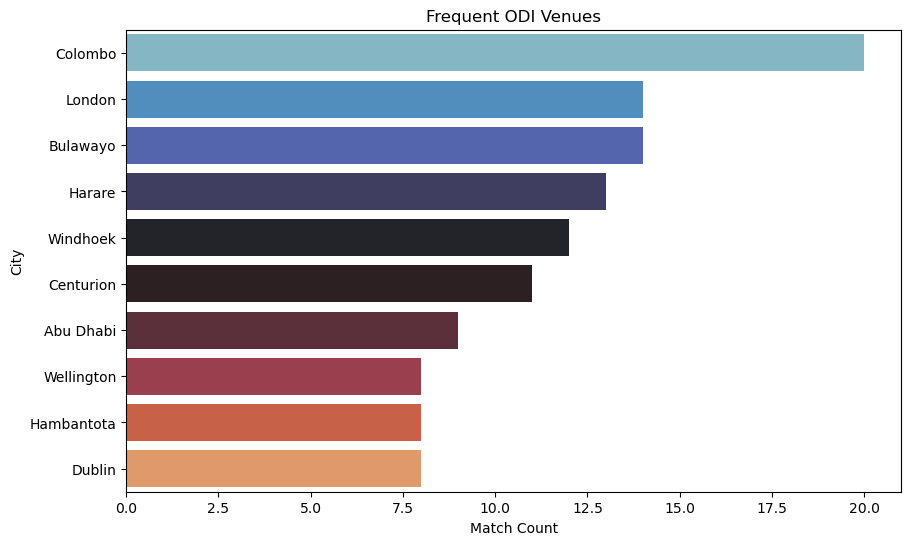

In [6]:
# 3.Frequent Venues in ODI
query_name = "frequent_venues_odi"
if query_name in queries:
    print(f"Executing query: {query_name}")
    query_sql = queries[query_name]
    result_df = execute_query(conn, query_sql)
    print(result_df)
    
    if not result_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x="match_count", y="city", data=result_df, palette="icefire", hue="city", dodge=False)
        plt.title("Frequent ODI Venues")
        plt.xlabel("Match Count")
        plt.ylabel("City")
        plt.show()
    else:
        print("No data available for visualization.")
else:
    print("Query not found.")


C:\Users\user\AppData\Local\Temp\ipykernel_27600\4195853444.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awards_count', y='player_of_match', data=df, palette='magma')


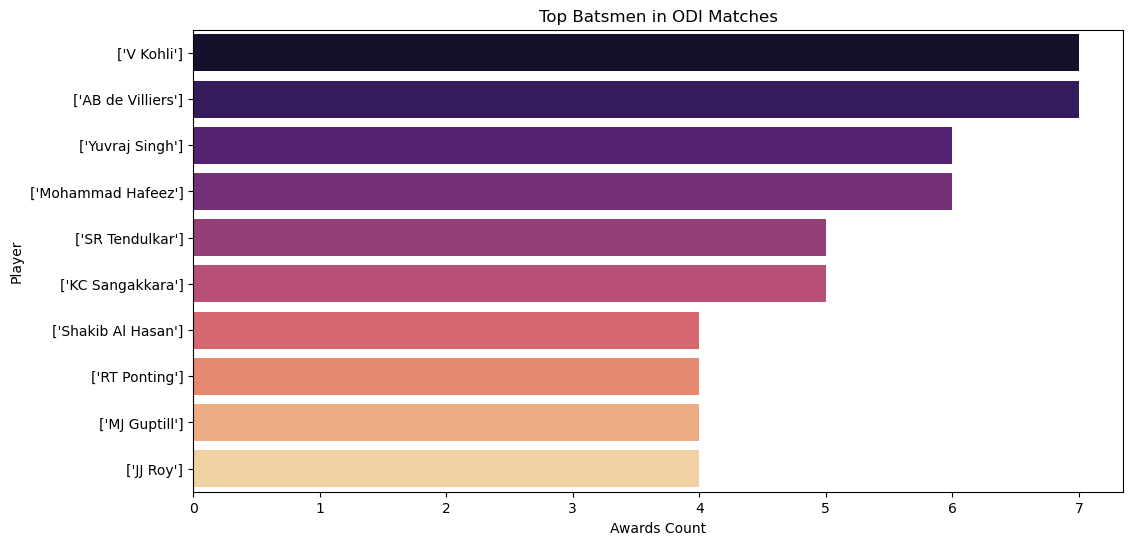

In [12]:
##4. Top Batsmen (ODI)
query = """
    SELECT player_of_match, COUNT(*) AS awards_count
    FROM odi_matches
    WHERE player_of_match IS NOT NULL
    GROUP BY player_of_match
    ORDER BY awards_count DESC
    LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(12, 6))
sns.barplot(x='awards_count', y='player_of_match', data=df, palette='magma')
plt.title('Top Batsmen in ODI Matches')
plt.xlabel('Awards Count')
plt.ylabel('Player')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27600\1438796244.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets_count', y='player_of_match', data=df, palette='inferno')


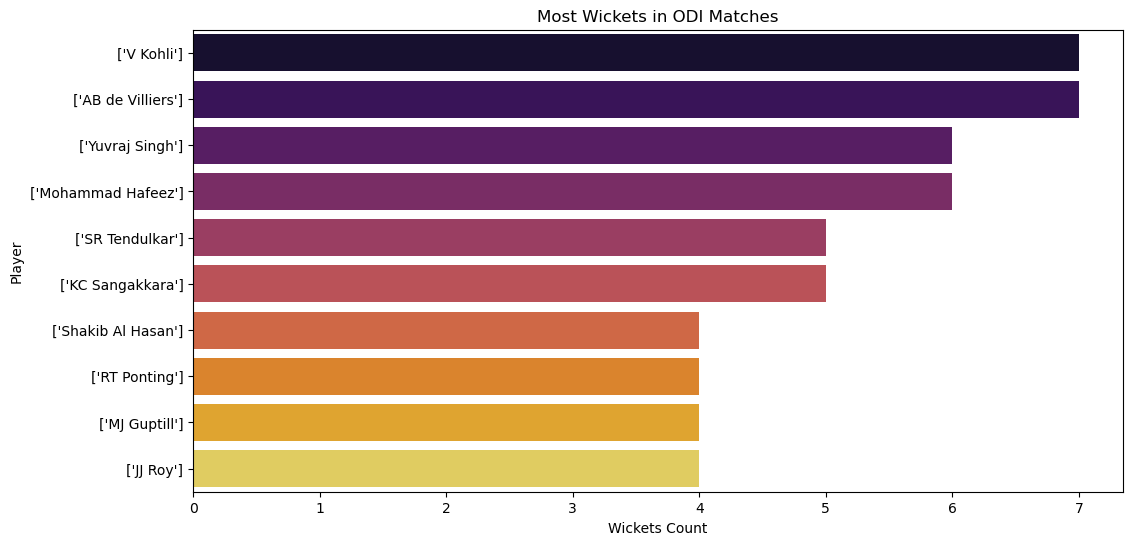

In [13]:
##5. Most Wickets (ODI)

query = """
    SELECT player_of_match, COUNT(*) AS wickets_count
    FROM odi_matches
    WHERE player_of_match IS NOT NULL
    GROUP BY player_of_match
    ORDER BY wickets_count DESC
    LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets_count', y='player_of_match', data=df, palette='inferno')
plt.title('Most Wickets in ODI Matches')
plt.xlabel('Wickets Count')
plt.ylabel('Player')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27600\509555528.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awards_count', y='player_of_match', data=df, palette='cividis')


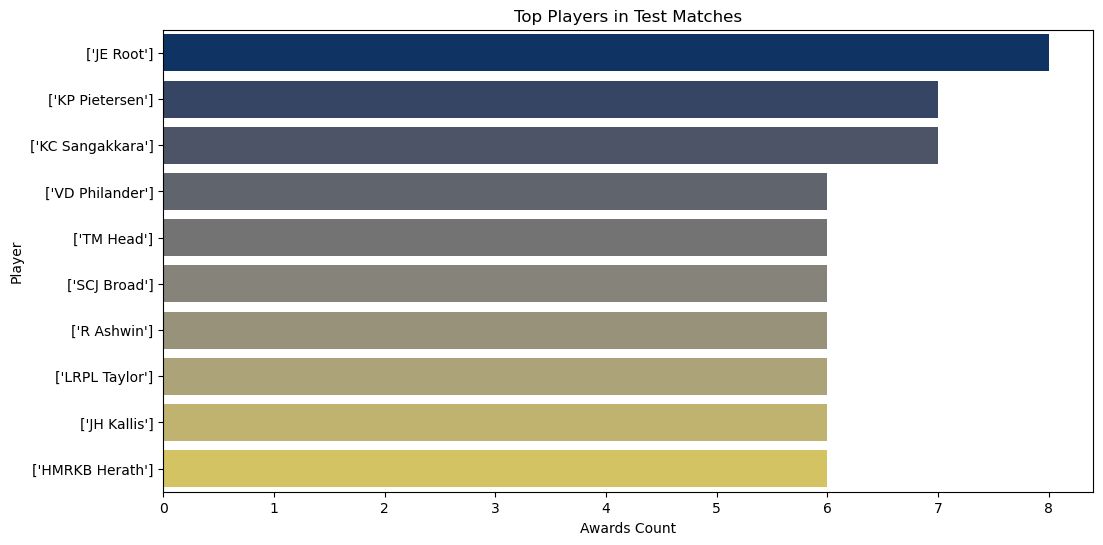

In [14]:
#6. Top Test Players (Test)
query = """
    SELECT player_of_match, COUNT(*) AS awards_count
    FROM test_matches
    WHERE player_of_match IS NOT NULL
    GROUP BY player_of_match
    ORDER BY awards_count DESC
    LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(12, 6))
sns.barplot(x='awards_count', y='player_of_match', data=df, palette='cividis')
plt.title('Top Players in Test Matches')
plt.xlabel('Awards Count')
plt.ylabel('Player')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27600\3428101771.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='match_count', y='city', data=df, palette='twilight')


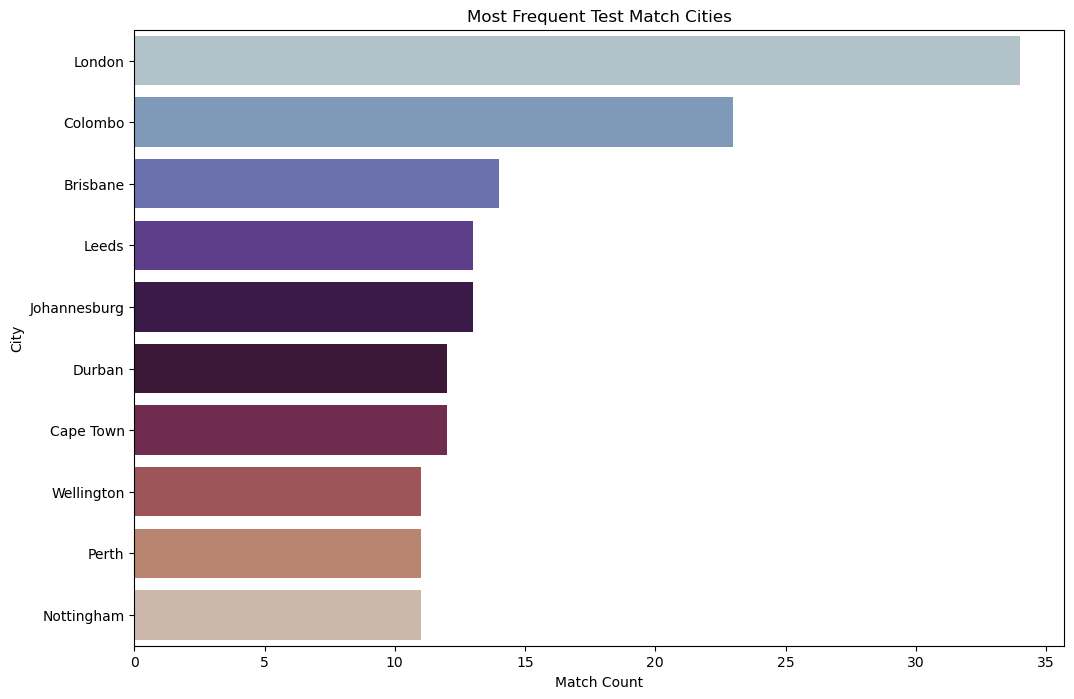

In [15]:
#7. Test Match Cities
query = """
    SELECT city, COUNT(*) AS match_count
    FROM test_matches
    WHERE city IS NOT NULL
    GROUP BY city
    ORDER BY match_count DESC
    LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(12, 8))
sns.barplot(x='match_count', y='city', data=df, palette='twilight')
plt.title('Most Frequent Test Match Cities')
plt.xlabel('Match Count')
plt.ylabel('City')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27600\1968400333.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='win_count', y='outcome_winner', data=df, palette='BuGn')


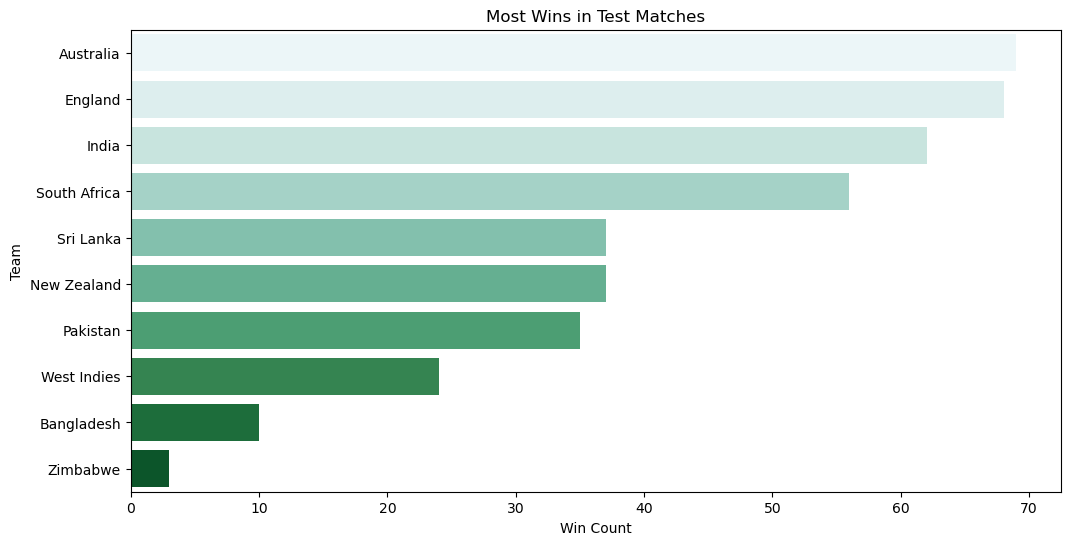

In [18]:
#8. Test Match Team Wins
query = """
    SELECT outcome_winner, COUNT(*) AS win_count
    FROM test_matches
    WHERE outcome_winner IS NOT NULL
    GROUP BY outcome_winner
    ORDER BY win_count DESC
    LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(12, 6))
sns.barplot(x='win_count', y='outcome_winner', data=df, palette='BuGn')
plt.title('Most Wins in Test Matches')
plt.xlabel('Win Count')
plt.ylabel('Team')
plt.show()


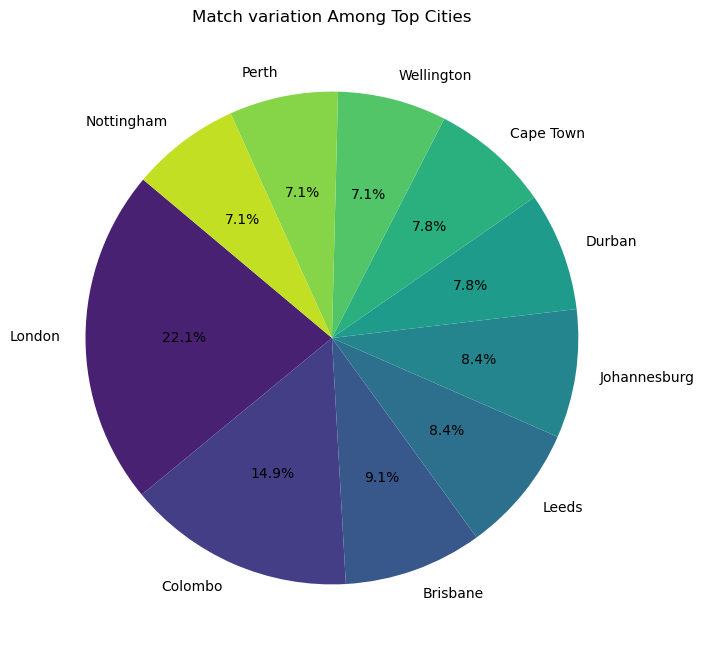

In [17]:
##9.Match variation Among Top Cities
query_name == "test_match_cities"
            # Pie chart
plt.figure(figsize=(8, 8))
plt.pie(result_df["match_count"], labels=result_df["city"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(result_df)))
plt.title("Match variation Among Top Cities")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27600\1001172965.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='outcome_by_wickets', y='match_id', data=df, palette='coolwarm')


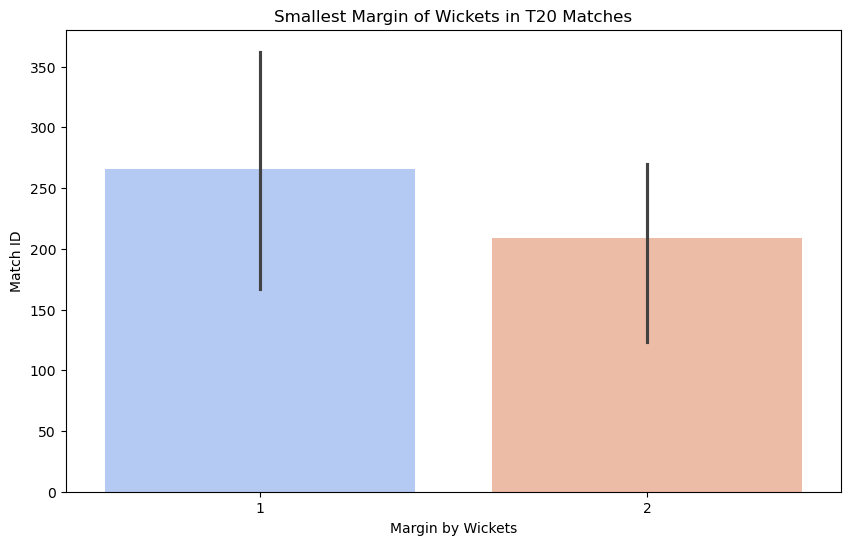

In [19]:
#10. Smallest Margin of Wickets (T20)
query = """
    SELECT match_id, outcome_by_wickets, season
    FROM t20_matches
    WHERE outcome_by_wickets IS NOT NULL
    ORDER BY outcome_by_wickets ASC
    LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10, 6))
sns.barplot(x='outcome_by_wickets', y='match_id', data=df, palette='coolwarm')
plt.title('Smallest Margin of Wickets in T20 Matches')
plt.xlabel('Margin by Wickets')
plt.ylabel('Match ID')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_27600\1295354566.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='match_count', data=df, palette='pastel')


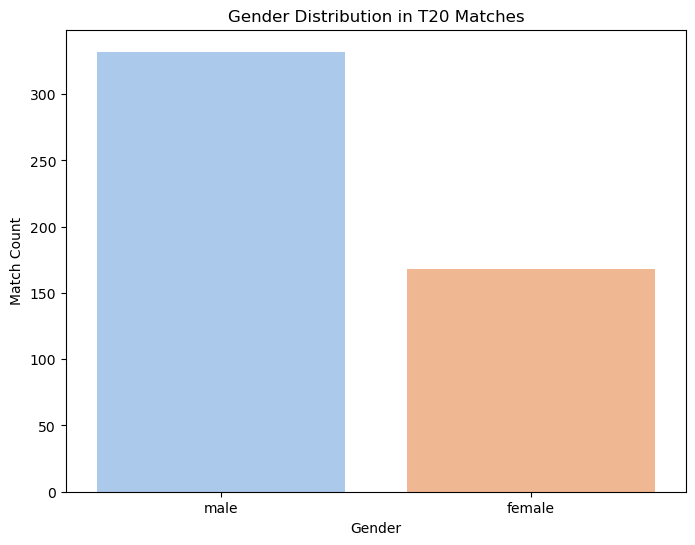

In [20]:
#11. Gender Distribution (T20)
query = """
    SELECT gender, COUNT(*) AS match_count
    FROM t20_matches
    GROUP BY gender
    ORDER BY match_count DESC;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='match_count', data=df, palette='pastel')
plt.title('Gender Distribution in T20 Matches')
plt.xlabel('Gender')
plt.ylabel('Match Count')
plt.show()
